In [1]:
%matplotlib inline
from marketdata import *
from model import *
from analytics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from datetime import datetime

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Load data 

Try clean up markets with 100% close out values

In [2]:
mkts=get_market_list()

In [3]:
df=pd.DataFrame()
for m in mkts:
    try:
        df[m]=get_timeseries(m)
    except:
        print m

In [4]:
FundAUM=1e6
curr_px=get_most_liquid_price(mkts)

In [7]:
pnl_with_lookbacks=pd.DataFrame()
for l in range(10,150,5):
    pos=ewma_mom_daily(df[mkts],l,3*l)
    pnl=calc_pnl_wc(pos,df[mkts])
    scaling_factor=calc_scaling_factor(pnl) 
    s=tsmom_daily_signal(df,l,3*l)
    lots=calc_position(s,FundAUM,scaling_factor,curr_px)
    PNL = calc_pnl_position_wc(lots,df,curr_px)
    pnl_with_lookbacks[str(l)]= (PNL.sum(axis=1)/FundAUM).dropna()

model.py:25: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=15).mean()
  signal=signal=pd.ewma(data,short_lookback)-pd.ewma(data,long_lookback)
model.py:25: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=45).mean()
  signal=signal=pd.ewma(data,short_lookback)-pd.ewma(data,long_lookback)
model.py:43: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=90,adjust=True,com=45).std(bias=False)
  return (signal/pd.ewmstd(signal,lookback,min_periods=lookback*2))
model.py:15: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=45,adjust=True,com=45).std(

KeyError: "Index([u'PP'], dtype='object') not in index"

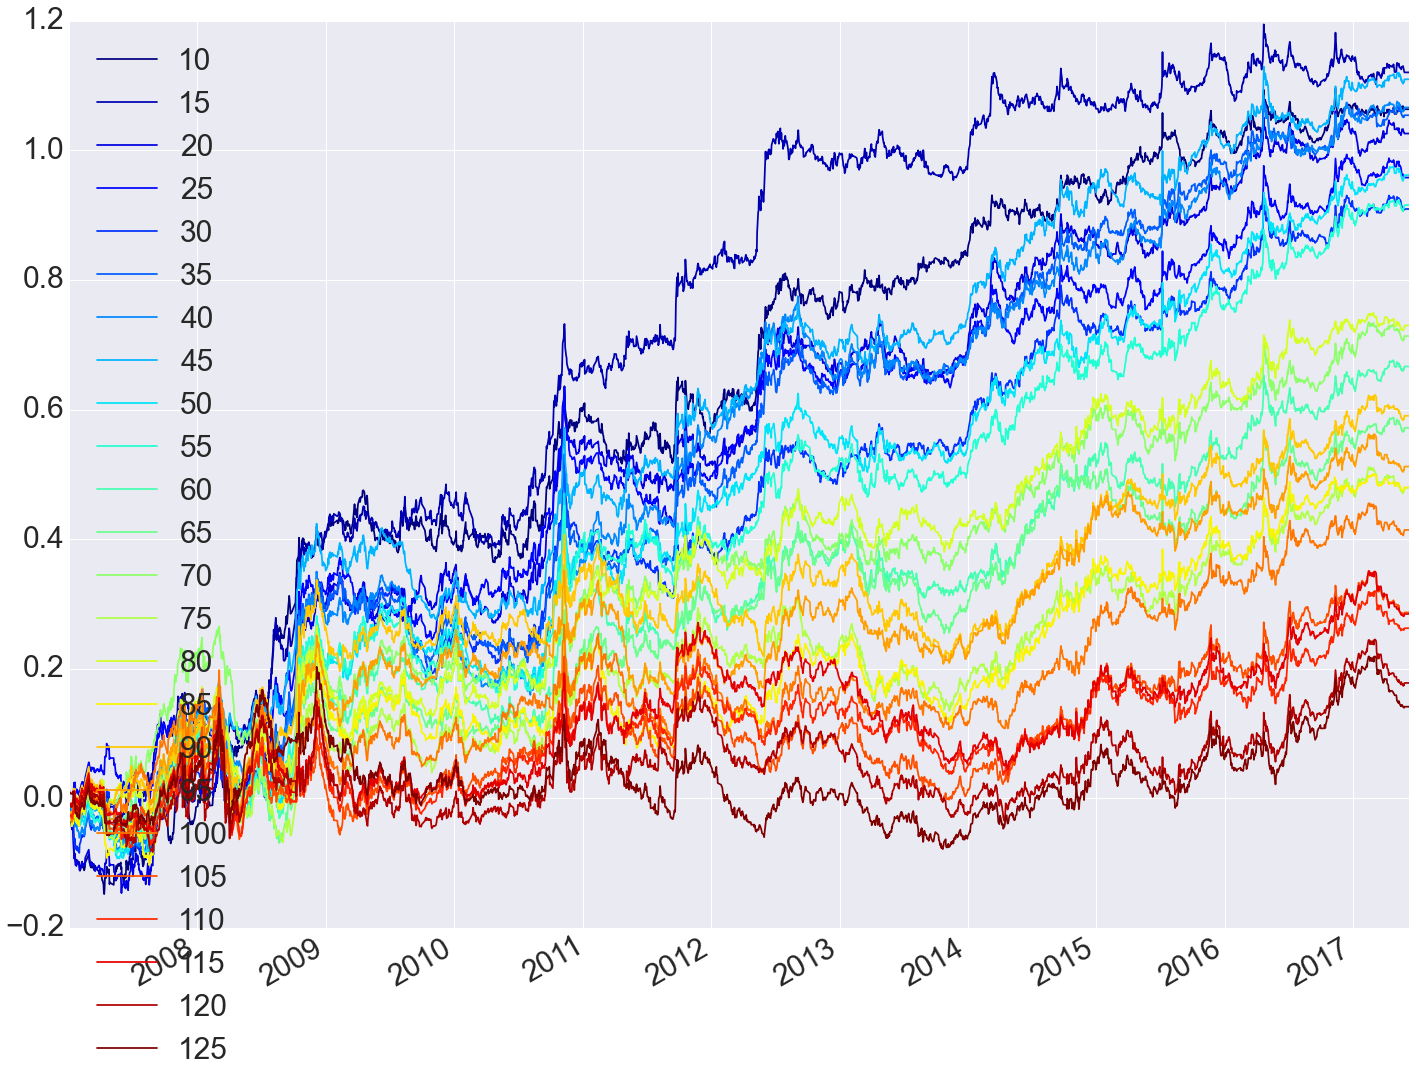

In [8]:
pnl_with_lookbacks['2007':].cumsum().plot(colormap='jet')

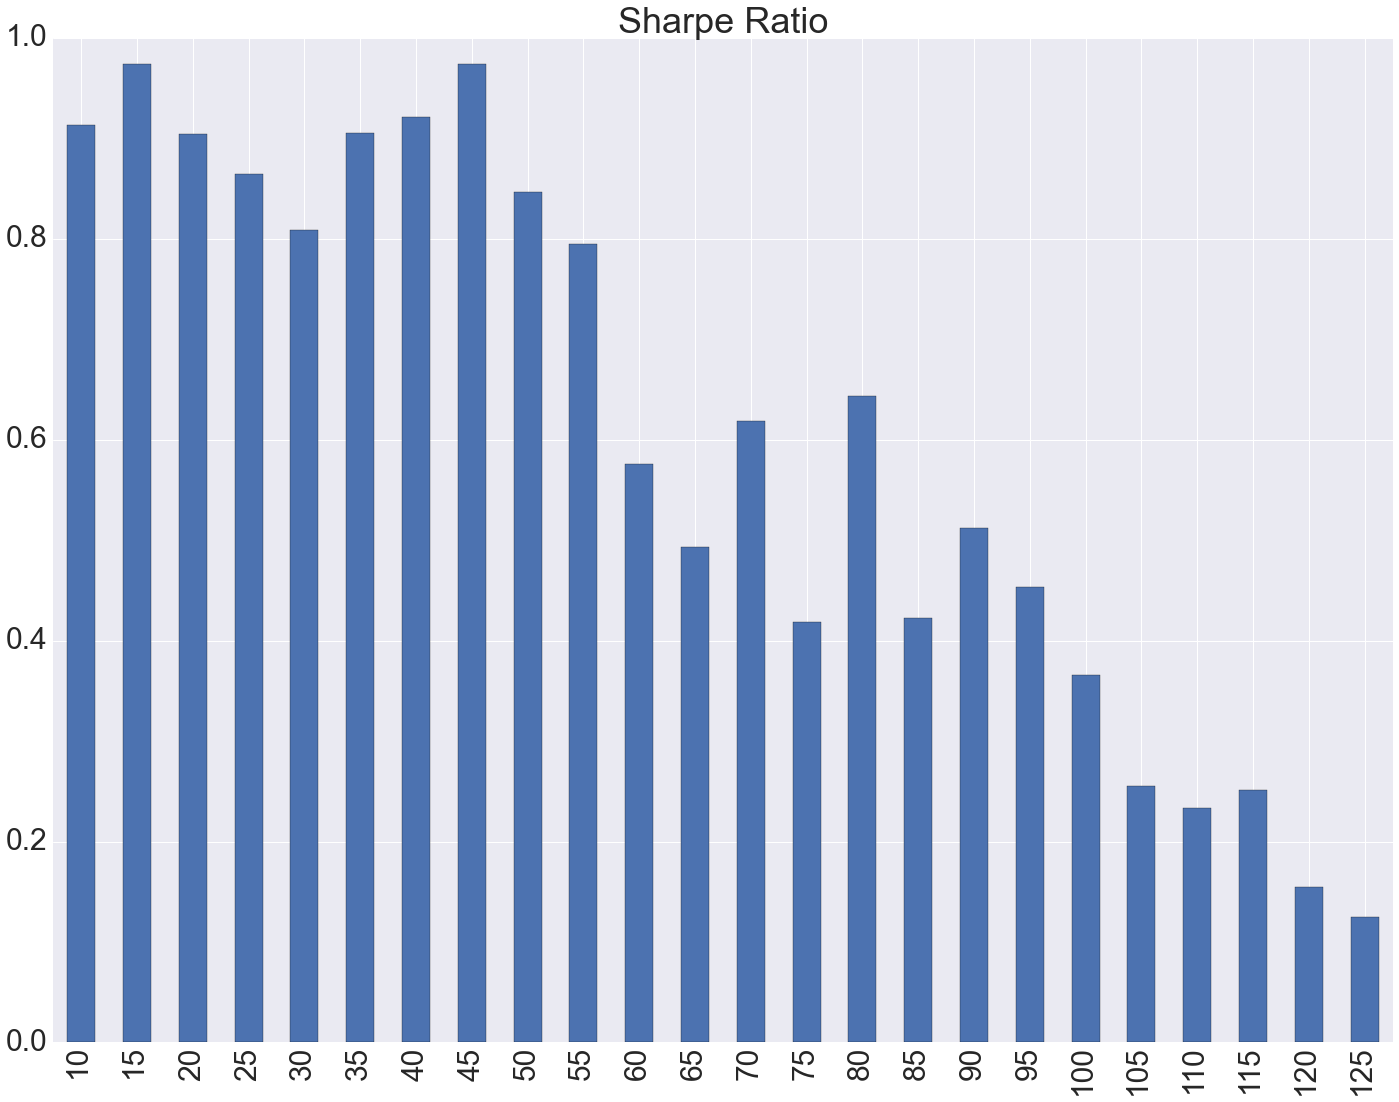

In [9]:
calc_Sharpe(pnl_with_lookbacks['2007':],250).plot(kind='bar',title='Sharpe Ratio')

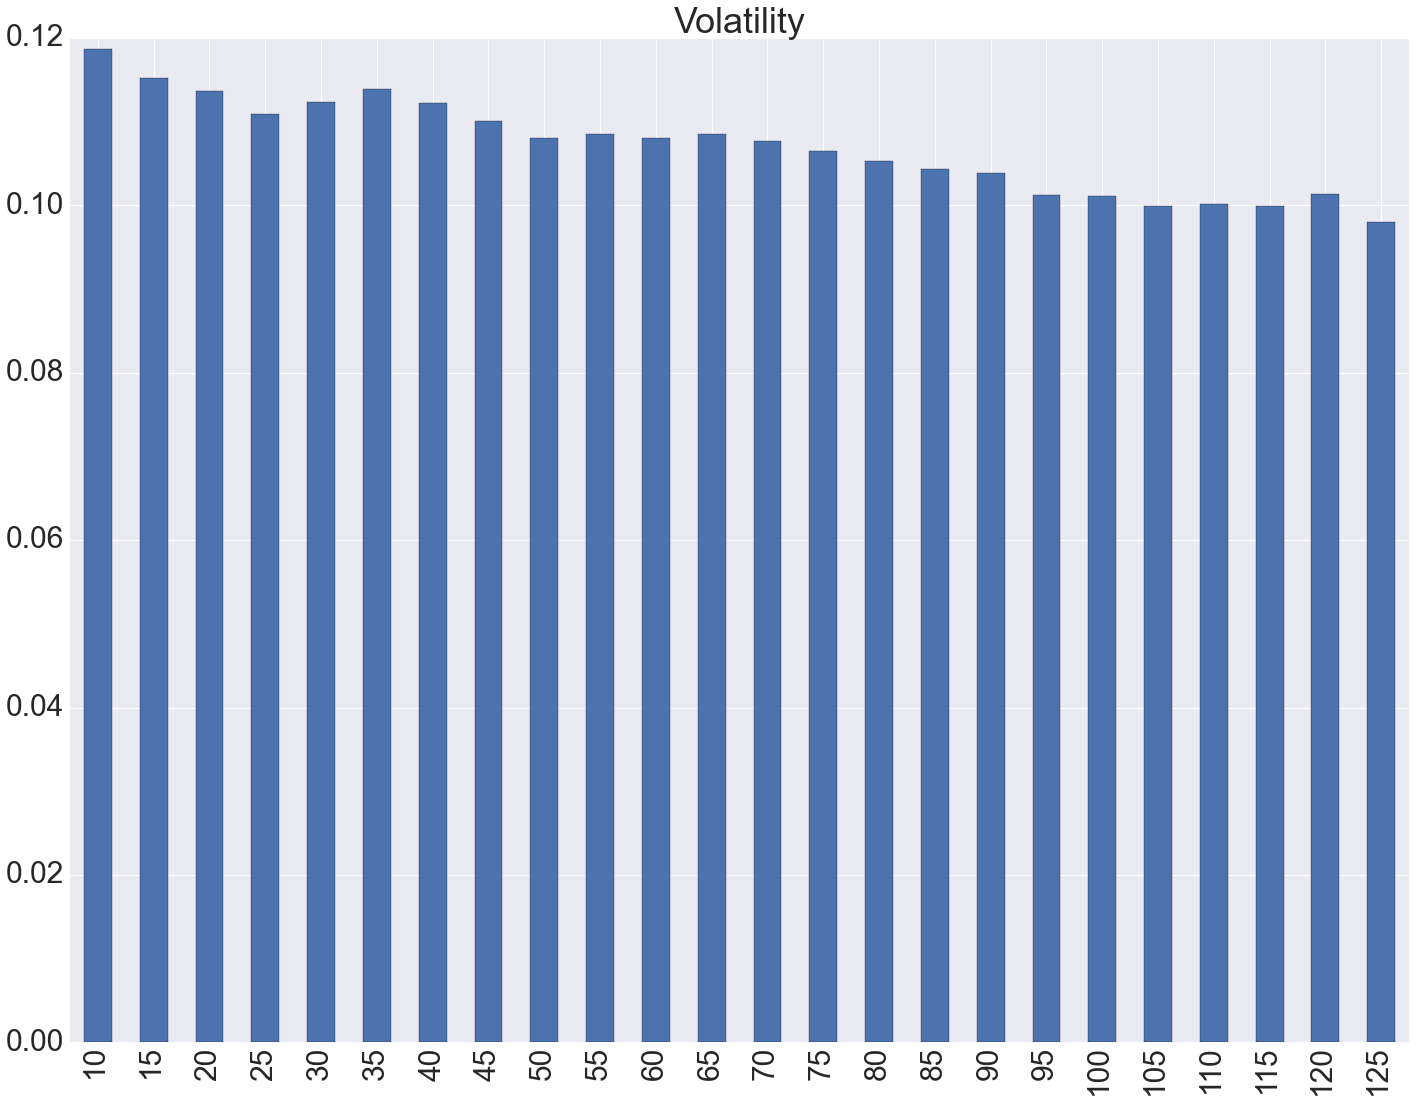

In [10]:
(pnl_with_lookbacks.std()*16).plot(kind='bar',title='Volatility')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


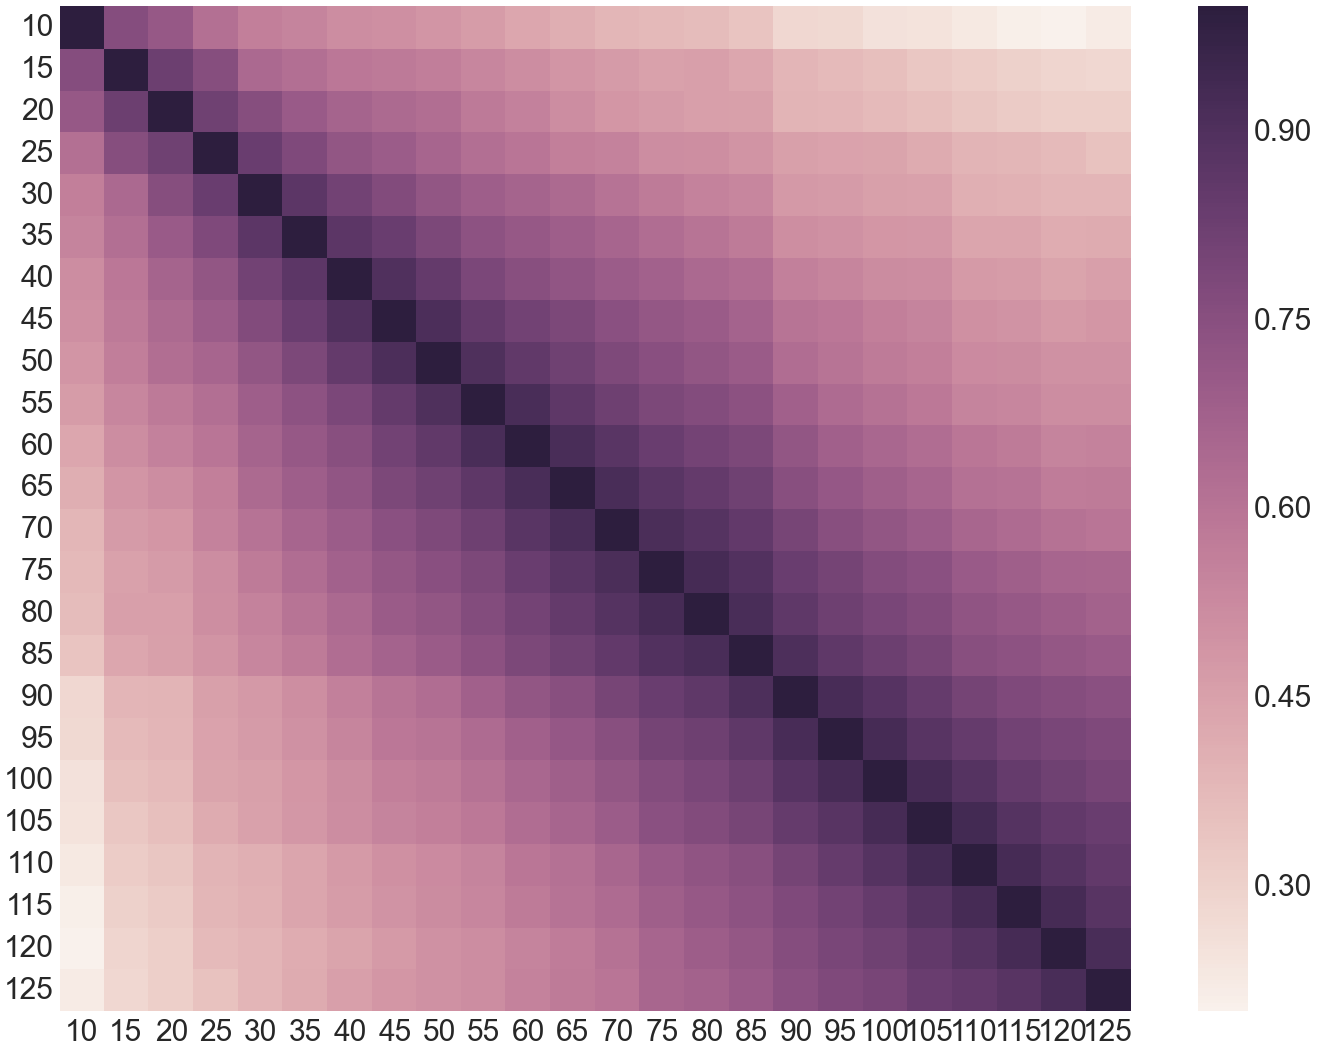

In [11]:
sns.heatmap(pnl_with_lookbacks.corr())

Drawdown analysis

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.rolling_max is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=1,window=1000000,center=False).max()
  from IPython.kernel.zmq import kernelapp as app


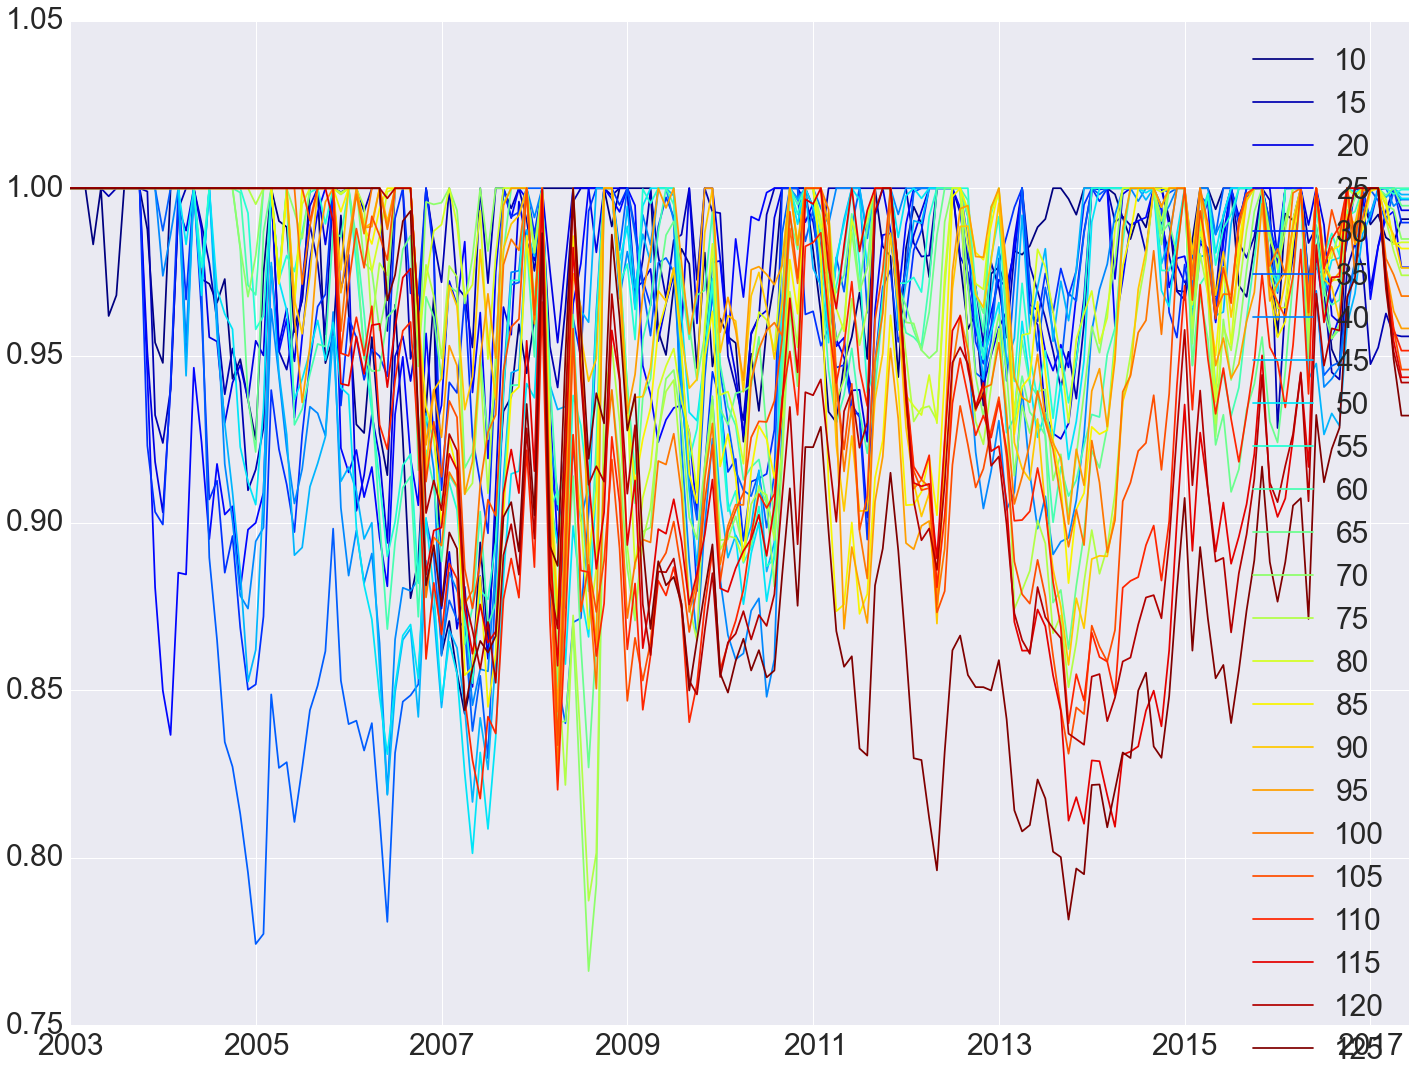

In [12]:
temp=(pnl_with_lookbacks.resample(rule='m',how='sum')+1).cumprod()
(temp/pd.rolling_max(temp,1000000,min_periods=1)).plot(colormap='jet')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.rolling_max is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=1,window=1000000,center=False).max()
  if __name__ == '__main__':


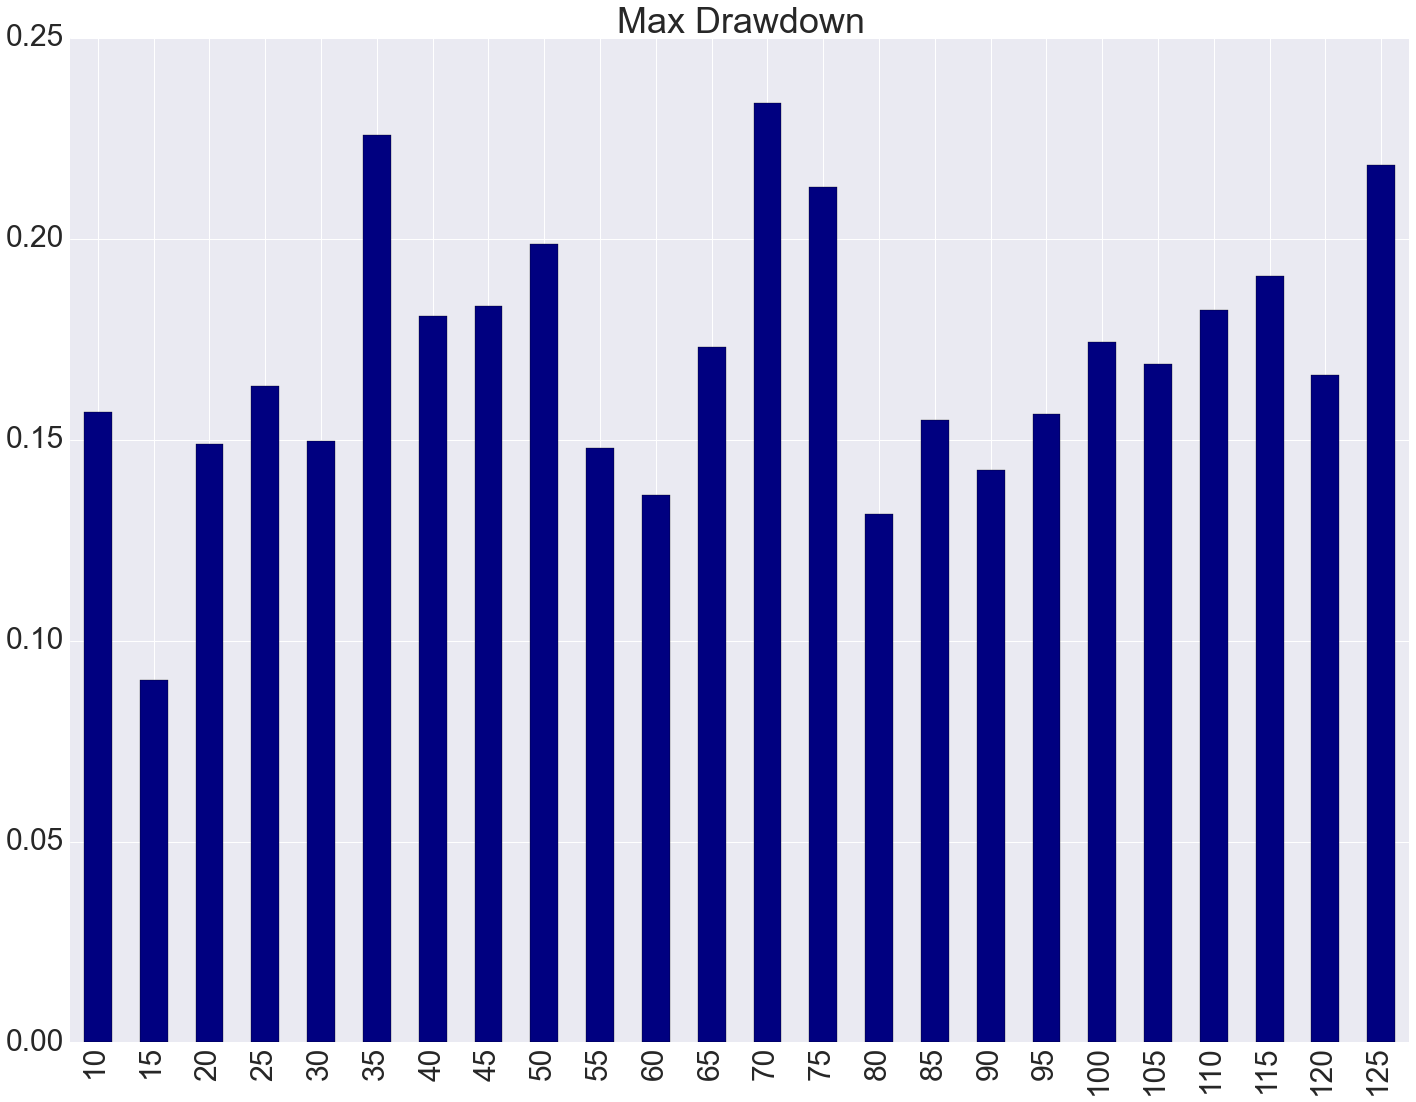

In [13]:
temp2=(1-(temp/pd.rolling_max(temp,1000000,min_periods=1)).min())
temp2.plot(kind='bar',colormap='jet',title='Max Drawdown')